**IMPORTANDO AS BIBLIOTECAS NECESSARIAS**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
import seaborn as sns

warnings.simplefilter(action='ignore', category=Warning)

## **CARREGANDO OS DADOS**

In [ ]:
# Schema do dados
schema = {
    'codigo': 'int64',
    'valor': 'float64',
}


insumos = pd.read_csv('/content/drive/MyDrive/PROJETO APLICADO/dados_insumos.csv', encoding='ISO-8859-1', sep = ";", dtype=schema)
classif = pd.read_csv('/content/drive/MyDrive/PROJETO APLICADO/materiais categorizados/MATERIAIS.csv', encoding='ISO-8859-1', sep = ";")

In [ ]:
# Nomes das colunas do dataset classif
classif.columns

Index(['CODIGO', 'DESCRICAO DO INSUMO', 'UNIDADE',
       'Coeficiente de Representatividade Nacional (*)', 'PRECO MEDIANO R$',
       'ENCARGOS', 'mês', 'ano', 'localidade', 'cat 1', 'commodities',
       'CLASSE', 'cat 2', 'cat3', 'cat4', 'outros'],
      dtype='object')

In [ ]:
# Deletar as colunas sem utilizade
classif.drop(columns = ['PRECO MEDIANO R$','ENCARGOS','mês', 'ano','localidade'], inplace=True)

In [ ]:
# Renomeação dos dados classif
classif.columns =['codigo', 'descricao', 'unidade','coeficiente', 'cat_1',
                 'commodities', 'classe', 'cat_2', 'cat_3', 'cat_4', 'outros']

In [ ]:
# Realiza o merge usando a coluna "codigo" como chave de junção
dados = pd.merge(insumos, classif, on='codigo')

In [ ]:
# Conversão da colunas data para datetime
dados['data'] = pd.to_datetime(dados['data'], format='%m/%y')

In [ ]:
dados.head(10)

,codigo,descricao_x,valor,data,descricao_y,unidade,coeficiente,cat_1,commodities,classe,cat_2,cat_3,cat_4,outros
0,414,"ABRACADEIRA DE NYLON PARA AMARRACAO DE CABOS, ...",0.07,2010-01-01,"ABRACADEIRA DE NYLON PARA AMARRACAO DE CABOS, ...",UN,"0,325428",MATERIAL,nylon,PLASTICO,Instalações Elétricas e Comunicação,"Parafusos, porcas, chumbadores",NaN,NaN
1,414,"ABRACADEIRA DE NYLON PARA AMARRACAO DE CABOS, ...",0.06,2011-01-01,"ABRACADEIRA DE NYLON PARA AMARRACAO DE CABOS, ...",UN,"0,325428",MATERIAL,nylon,PLASTICO,Instalações Elétricas e Comunicação,"Parafusos, porcas, chumbadores",NaN,NaN
2,414,"ABRACADEIRA DE NYLON PARA AMARRACAO DE CABOS, ...",0.06,2012-01-01,"ABRACADEIRA DE NYLON PARA AMARRACAO DE CABOS, ...",UN,"0,325428",MATERIAL,nylon,PLASTICO,Instalações Elétricas e Comunicação,"Parafusos, porcas, chumbadores",NaN,NaN
3,414,"ABRACADEIRA DE NYLON PARA AMARRACAO DE CABOS, ...",0.05,2013-01-01,"ABRACADEIRA DE NYLON PARA AMARRACAO DE CABOS, ...",UN,"0,325428",MATERIAL,nylon,PLASTICO,Instalações Elétricas e Comunicação,"Parafusos, porcas, chumbadores",NaN,NaN
4,414,"ABRACADEIRA DE NYLON PARA AMARRACAO DE CABOS, ...",0.06,2014-01-01,"ABRACADEIRA DE NYLON PARA AMARRACAO DE CABOS, ...",UN,"0,325428",MATERIAL,nylon,PLASTICO,Instalações Elétricas e Comunicação,"Parafusos, porcas, chumbadores",NaN,NaN
5,414,"ABRACADEIRA DE NYLON PARA AMARRACAO DE CABOS, ...",0.04,2015-01-01,"ABRACADEIRA DE NYLON PARA AMARRACAO DE CABOS, ...",UN,"0,325428",MATERIAL,nylon,PLASTICO,Instalações Elétricas e Comunicação,"Parafusos, porcas, chumbadores",NaN,NaN
6,414,"ABRACADEIRA DE NYLON PARA AMARRACAO DE CABOS, ...",0.04,2016-01-01,"ABRACADEIRA DE NYLON PARA AMARRACAO DE CABOS, ...",UN,"0,325428",MATERIAL,nylon,PLASTICO,Instalações Elétricas e Comunicação,"Parafusos, porcas, chumbadores",NaN,NaN
7,414,"ABRACADEIRA DE NYLON PARA AMARRACAO DE CABOS, ...",0.05,2017-01-01,"ABRACADEIRA DE NYLON PARA AMARRACAO DE CABOS, ...",UN,"0,325428",MATERIAL,nylon,PLASTICO,Instalações Elétricas e Comunicação,"Parafusos, porcas, chumbadores",NaN,NaN
8,414,"ABRACADEIRA DE NYLON PARA AMARRACAO DE CABOS, ...",0.04,2018-01-01,"ABRACADEIRA DE NYLON PARA AMARRACAO DE CABOS, ...",UN,"0,325428",MATERIAL,nylon,PLASTICO,Instalações Elétricas e Comunicação,"Parafusos, porcas, chumbadores",NaN,NaN
9,414,"ABRACADEIRA DE NYLON PARA AMARRACAO DE CABOS, ...",0.04,2019-01-01,"ABRACADEIRA DE NYLON PARA AMARRACAO DE CABOS, ...",UN,"0,325428",MATERIAL,nylon,PLASTICO,Instalações Elétricas e Comunicação,"Parafusos, porcas, chumbadores",NaN,NaN


In [ ]:
# Descrição dos dados
dados.codigo.value_counts().describe([0.48])

count    3427.000000
mean      120.630581
std        45.675869
min         4.000000
48%       156.000000
50%       156.000000
max       156.000000
Name: codigo, dtype: float64

In [ ]:
# Verificar a quantidade de dados por classe de material
dados.groupby('classe').count()

,codigo,descricao_x,valor,data,descricao_y,unidade,coeficiente,cat_1,commodities,cat_2,cat_3,cat_4,outros
classe,,,,,,,,,,,,,
AGREGADOS,6285,6285,6285,6285,6285,6285,6285,6285,6285,6285,5745,0,312
ARGILA,7922,7922,7922,7922,7922,7922,7922,7922,7922,7922,7922,0,389
CIMENTO E CONCRETO,35526,35526,35526,35526,35526,35526,35526,35526,35526,35526,35526,12041,31056
MADEIRA,20856,20856,20856,20856,20856,20856,20856,20856,20856,20856,20670,0,468
METAL,217274,217274,217274,217274,217274,217274,217274,217274,217274,217274,204628,0,6035
PLASTICO,121613,121613,121613,121613,121613,121613,121613,121613,121613,121613,117912,0,51781
VIDRO,3925,3925,3925,3925,3925,3925,3925,3925,3925,3925,107,0,0


**Filtrar os dados por somente os insumos que estiverem presentes em todos os meses**

In [ ]:
# Verificação dos dados
contagem_check = dados.groupby('codigo', as_index=False).count()
contagem_check['count'] = contagem_check['descricao_x']
contagem_check = contagem_check[['codigo', 'count']]

In [ ]:
# Realiza o merge usando a coluna "codigo" como chave de junção
dados = pd.merge(dados, contagem_check, on='codigo')

In [ ]:
# Filtro
dados_filtrado = dados[dados['count'] > 155]

### **ANALISE DOS DADOS APÓS LIMPEZA**

In [ ]:
# Informações sobre dtypes, dimensão e valores nulos

print("Dimensão dos dados", dados_filtrado.shape,"\n" )
print(dados_filtrado.info())

Dimensão dos dados (284856, 15) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284856 entries, 0 to 315219
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   codigo       284856 non-null  int64         
 1   descricao_x  284856 non-null  object        
 2   valor        284856 non-null  float64       
 3   data         284856 non-null  datetime64[ns]
 4   descricao_y  284856 non-null  object        
 5   unidade      284856 non-null  object        
 6   coeficiente  284856 non-null  object        
 7   cat_1        284856 non-null  object        
 8   commodities  284856 non-null  object        
 9   classe       284856 non-null  object        
 10  cat_2        284856 non-null  object        
 11  cat_3        275028 non-null  object        
 12  cat_4        5772 non-null    object        
 13  outros       60060 non-null   object        
 14  count        284856 non-null  int64         
dtype

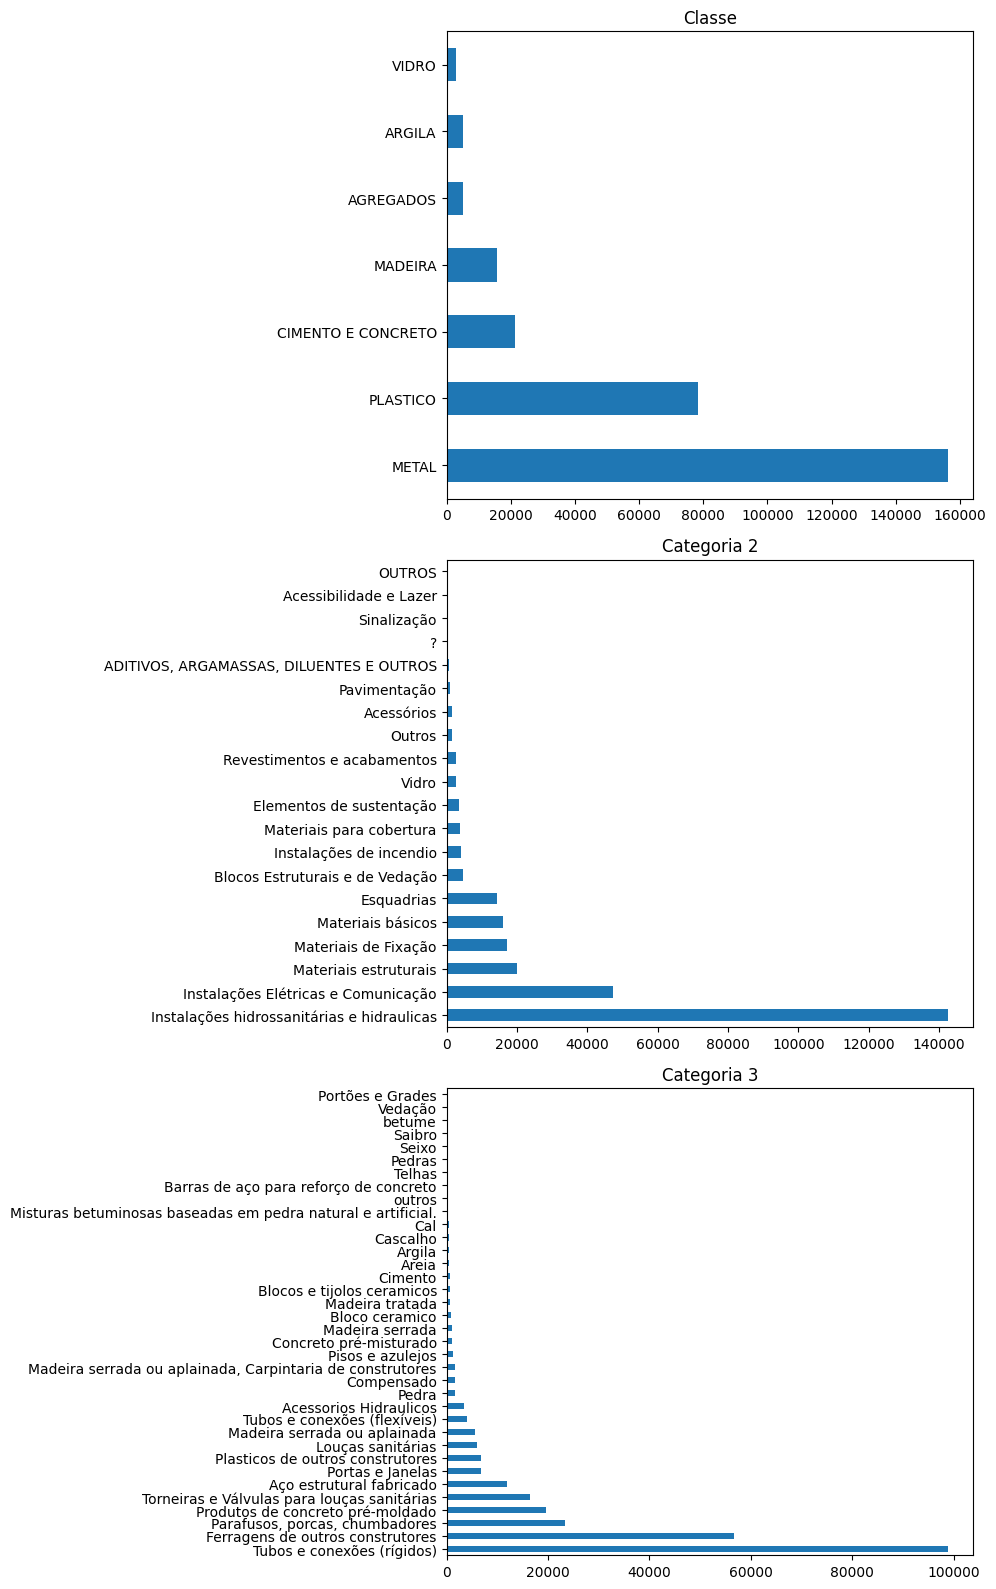

In [ ]:
# Visualização do primeiro nivel
import matplotlib.pyplot as plt

# Cria uma figura e um conjunto de eixos com 1 linha e 3 colunas
fig, axs = plt.subplots(3, 1, figsize=(10, 16))

# Plota o gráfico de barras para a classe
dados_filtrado.classe.value_counts().plot(kind='barh', ax=axs[0])
axs[0].set_title("Classe")

# Plota o gráfico de barras para a cat_2
dados_filtrado.cat_2.value_counts().plot(kind='barh', ax=axs[1])
axs[1].set_title("Categoria 2")

# Plota o gráfico de barras para a cat_3
dados_filtrado.cat_3.value_counts().plot(kind='barh', ax=axs[2])
axs[2].set_title("Categoria 3")

# Ajusta a disposição dos gráficos na figura
plt.tight_layout()

# Mostra a figura
plt.show()


# **EAD**

## **VARIAÇÃO GLOBAL**

In [ ]:
var_global = dados_filtrado[['data', 'valor']].groupby('data', as_index=False).mean()

In [ ]:
# Calcula a variação percentual mensal
var_global['variacao_mensal'] = var_global['valor'].pct_change() * 100
var_global['variacao_mensal'] = var_global['variacao_mensal'].fillna(0)

# Calcula o acumulado percentual
var_global['acumulado_percentual'] = (1 + var_global['variacao_mensal'] / 100).cumprod() * 100 - 100
var_global['acumulado_percentual'] = var_global['acumulado_percentual'].fillna(0)

var_global['ano'] = var_global['data'].dt.year
var_global['mes'] = var_global['data'].dt.month

In [ ]:
var_global.head()

,data,valor,variacao_mensal,acumulado_percentual,ano,mes
0,2010-01-01,63.130685,0.000000,0.000000,2010,1
1,2010-02-01,63.201769,0.112599,0.112599,2010,2
2,2010-03-01,63.022716,-0.283303,-0.171023,2010,3
3,2010-04-01,63.142185,0.189565,0.018217,2010,4
4,2010-05-01,63.100685,-0.065726,-0.047520,2010,5


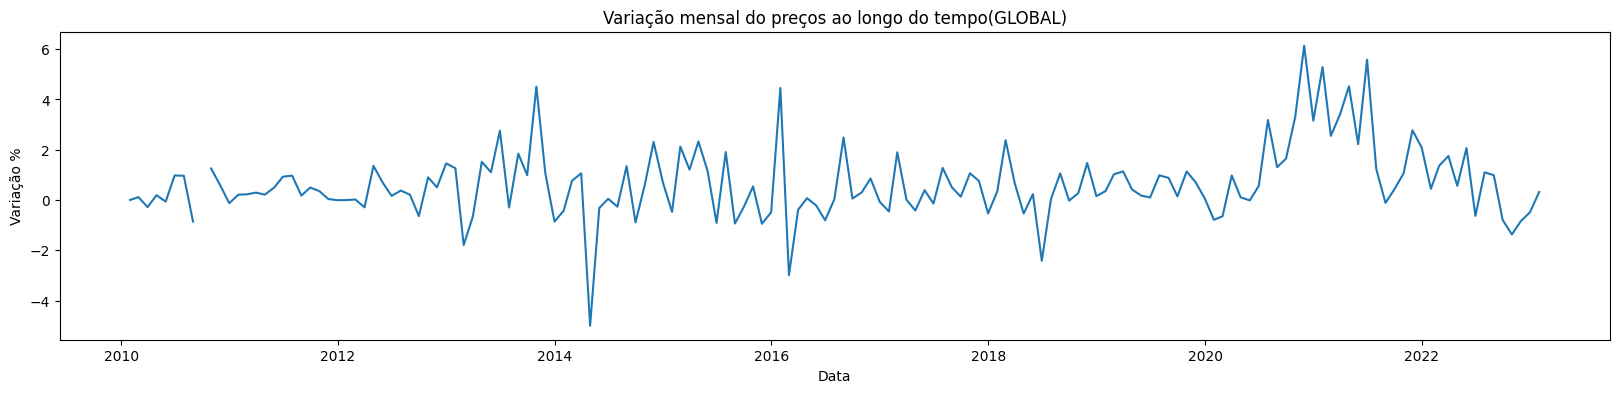

In [ ]:
# Converte a coluna 'data' para o formato de data
var_global['data'] = pd.to_datetime(var_global['data'])

# Agrupa os valores por mês e calcula a soma
agrupado_por_mes = var_global.groupby(pd.Grouper(key='data', freq='M')).mean()

# Plota um gráfico de linha com os valores
plt.subplots(figsize=(20, 4))
plt.plot(agrupado_por_mes.index, agrupado_por_mes['variacao_mensal'])
plt.title('Variação mensal do preços ao longo do tempo(GLOBAL)')
plt.xlabel('Data')
plt.ylabel('Variação %')
plt.show()

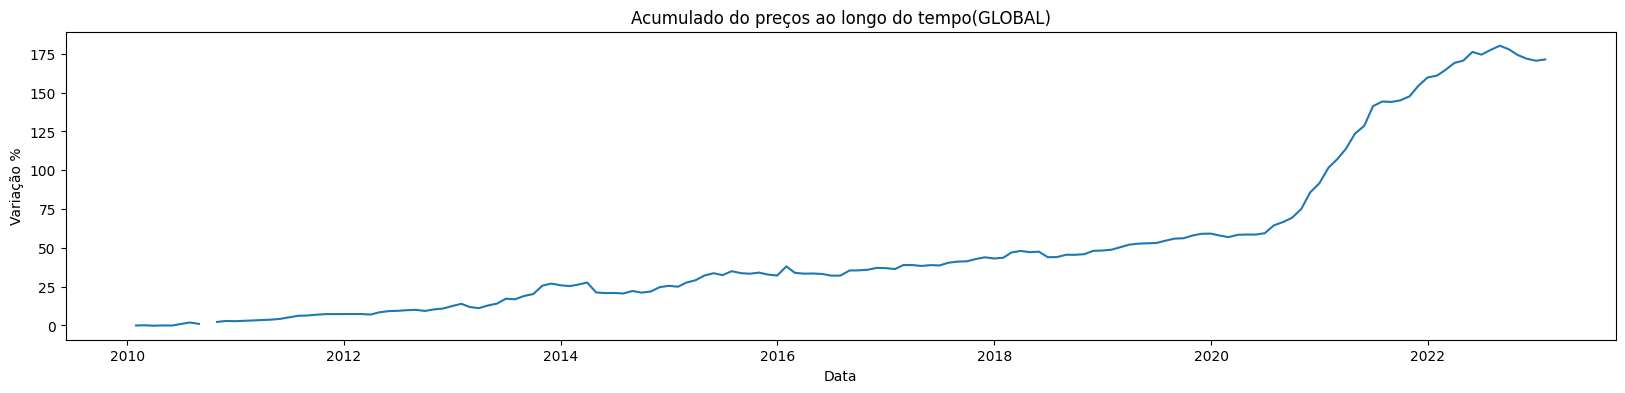

In [ ]:
# Converte a coluna 'data' para o formato de data
var_global['data'] = pd.to_datetime(var_global['data'])

# Agrupa os valores por mês e calcula a soma
agrupado_por_mes = var_global.groupby(pd.Grouper(key='data', freq='M')).mean()

# Plota um gráfico de linha com os valores
plt.subplots(figsize=(20, 4))
plt.plot(agrupado_por_mes.index, agrupado_por_mes['acumulado_percentual'])
plt.title('Acumulado do preços ao longo do tempo(GLOBAL)')
plt.xlabel('Data')
plt.ylabel('Variação %')
plt.show()

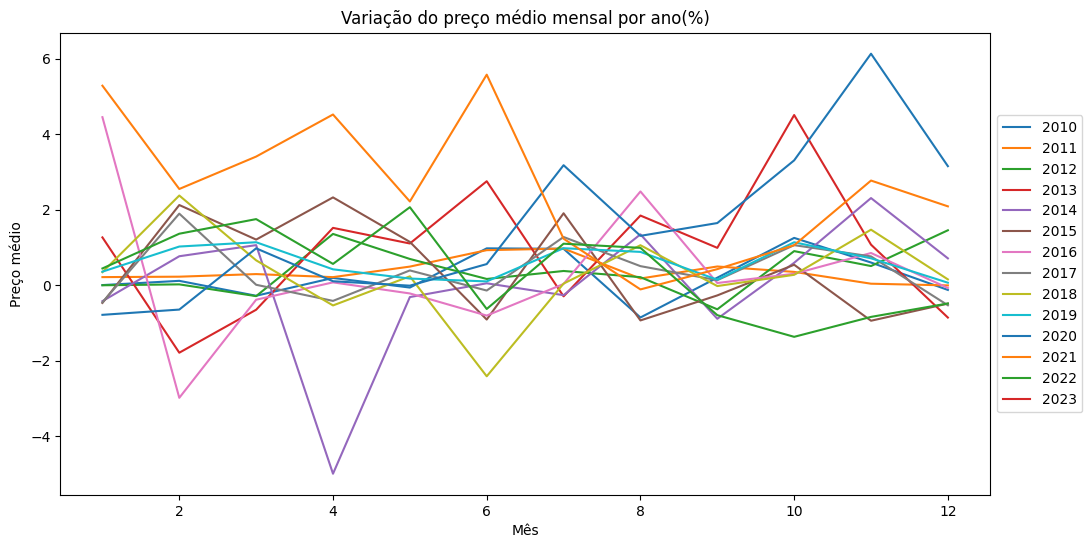

In [ ]:
# Agrupa os dados por ano
grupos_ano = var_global.groupby('ano')

# Cria uma figura e um conjunto de eixos
fig, ax = plt.subplots(figsize=(12, 6))

# Plota as linhas para cada ano
for ano, dados in grupos_ano:
    ax.plot(dados['mes'], dados['variacao_mensal'], label=ano)

# Define o título e os rótulos dos eixos
ax.set_title("Variação do preço médio mensal por ano(%)")
ax.set_xlabel("Mês")
ax.set_ylabel("Preço médio")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Mostra o gráfico
plt.show()

##**NIVEL 1: CLASSE DE MATERIAIS**

In [ ]:
# Agrupar por classe, data e valor
agrup_classe = dados_filtrado[['classe', 'data', 'valor']].groupby(['classe', 'data'], as_index=False)['valor'].mean().sort_values(by='data')

In [ ]:
agrup_classe['ano'] = agrup_classe['data'].dt.year
agrup_classe['mes'] = agrup_classe['data'].dt.month

In [ ]:
# Visualização
agrup_classe.head()

,classe,data,valor,ano,mes
0,AGREGADOS,2010-01-01,84.041818,2010,1
468,MADEIRA,2010-01-01,45.859406,2010,1
624,METAL,2010-01-01,73.877196,2010,1
780,PLASTICO,2010-01-01,21.045777,2010,1
156,ARGILA,2010-01-01,51.131515,2010,1


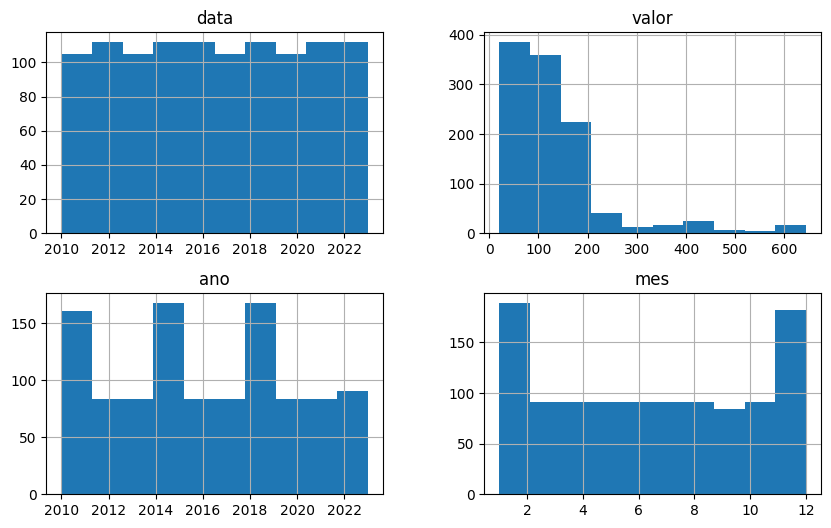

In [ ]:
# Visualização do primeiro nivel CLASSE

agrup_classe.hist(figsize = (10,6));

In [ ]:
agrup_classe.describe()

,valor,ano,mes
count,1092.000000,1092.000000,1092.000000
mean,133.482756,2016.083333,6.448718
std,107.364881,3.753570,3.475478
min,21.045777,2010.000000,1.000000
25%,73.272572,2013.000000,3.000000
50%,110.446382,2016.000000,6.000000
75%,161.813055,2019.000000,9.250000
max,643.266667,2023.000000,12.000000


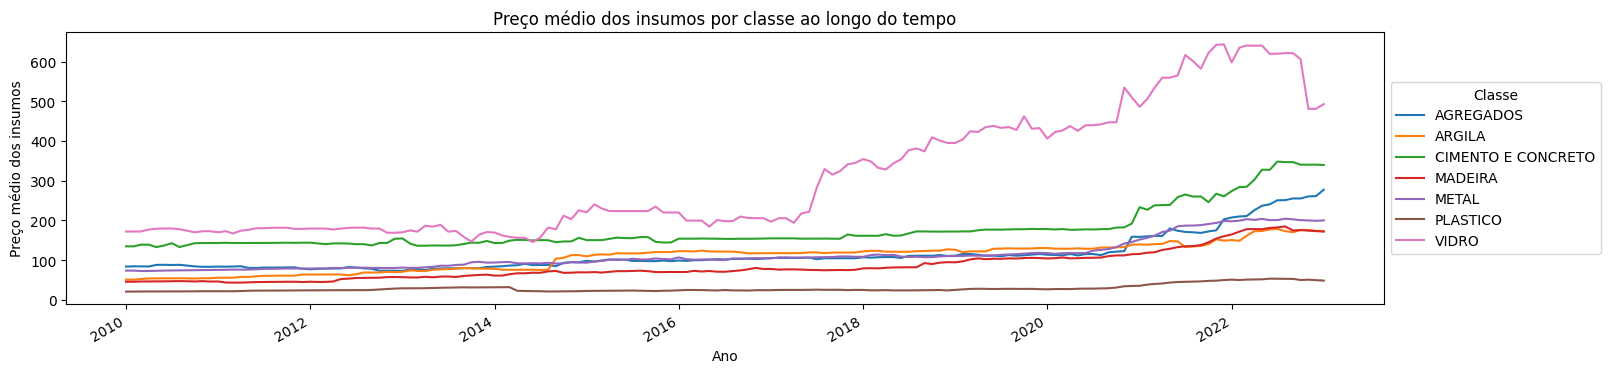

In [ ]:
# Agrupa os dados por classe e data e calcula a média dos valores
agrupado = agrup_classe.groupby(['classe', 'data']).mean().reset_index()

# Cria um dataframe com as colunas "data" e uma coluna para cada classe
pivotado = agrupado.pivot(index='data', columns='classe', values='valor')

# Plota um gráfico de linha para cada classe
ax = pivotado.plot(figsize=(17,4))

# Adiciona um título e uma legenda
ax.set_title('Preço médio dos insumos por classe ao longo do tempo')
ax.legend(title='Classe', loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Preço médio dos insumos')
plt.xlabel('Ano')

plt.show()

**ANALISANDO CADA CLASSE DE MATERIAL**

### **METAL**

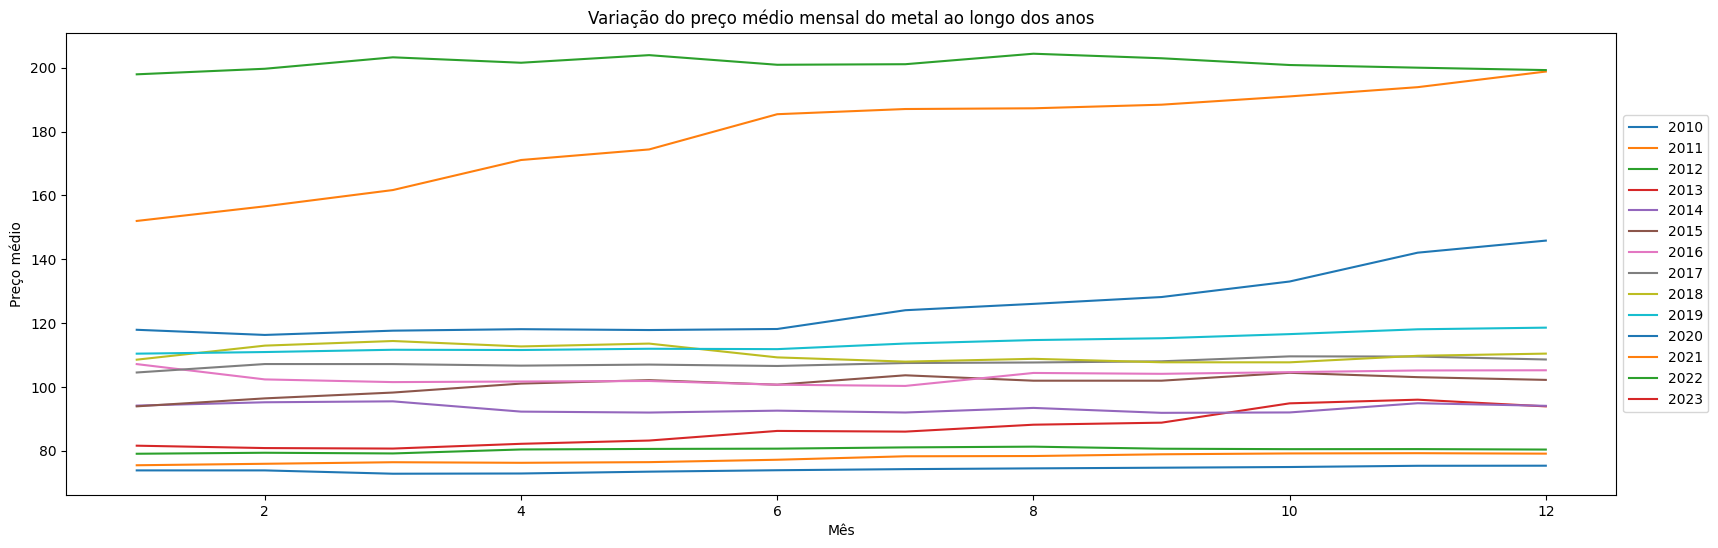

In [ ]:
# Filtro
filtro_metal = agrup_classe[agrup_classe['classe'] == 'METAL']


filtro_metal['anos'] = filtro_metal['ano'].astype('category')

# Agrupa os dados por ano
grupos_ano = filtro_metal.groupby('anos')

# Cria uma figura e um conjunto de eixos
fig, ax = plt.subplots(figsize=(20, 6))

# Plota as linhas para cada ano
for ano, dados in grupos_ano:
    ax.plot(dados['mes'], dados['valor'], label=ano)

# Define o título e os rótulos dos eixos
ax.set_title("Variação do preço médio mensal do metal ao longo dos anos")
ax.set_xlabel("Mês")
ax.set_ylabel("Preço médio")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Mostra o gráfico
plt.show()

In [ ]:
# Calcula a variação percentual mensal
filtro_metal['variacao_mensal'] = filtro_metal['valor'].pct_change() * 100
filtro_metal['variacao_mensal'] = filtro_metal['variacao_mensal'].fillna(0)

# Calcula o acumulado percentual
filtro_metal['acumulado_percentual'] = (1 + filtro_metal['variacao_mensal'] / 100).cumprod() * 100 - 100
filtro_metal['acumulado_percentual'] = filtro_metal['acumulado_percentual'].fillna(0)

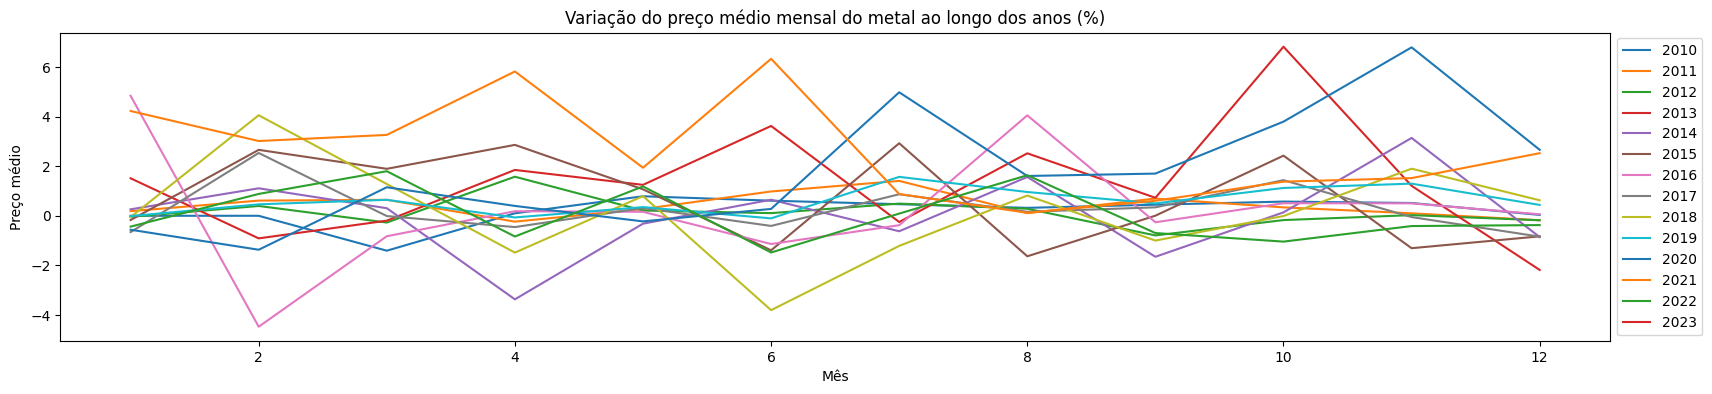

In [ ]:
# Agrupa os dados por ano
grupos_ano = filtro_metal.groupby('anos')

# Cria uma figura e um conjunto de eixos
fig, ax = plt.subplots(figsize=(20, 4))

# Plota as linhas para cada ano
for ano, dados in grupos_ano:
    ax.plot(dados['mes'], dados['variacao_mensal'], label=ano)

# Define o título e os rótulos dos eixos
ax.set_title("Variação do preço médio mensal do metal ao longo dos anos (%)")
ax.set_xlabel("Mês")
ax.set_ylabel("Preço médio")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Mostra o gráfico
plt.show()

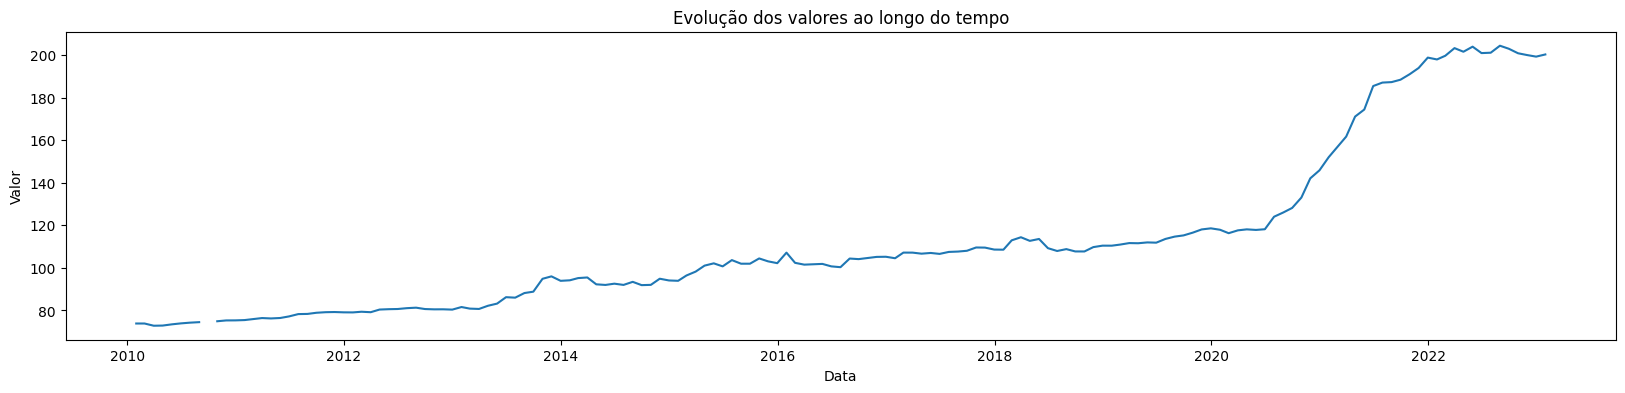

In [ ]:
# Converte a coluna 'data' para o formato de data
filtro_metal['data'] = pd.to_datetime(filtro_metal['data'])

# Agrupa os valores por mês e calcula a soma
agrupado_por_mes = filtro_metal.groupby(pd.Grouper(key='data', freq='M')).mean()

# Plota um gráfico de linha com os valores
plt.subplots(figsize=(20, 4))
plt.plot(agrupado_por_mes.index, agrupado_por_mes['valor'])
plt.title('Evolução dos valores ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.show()

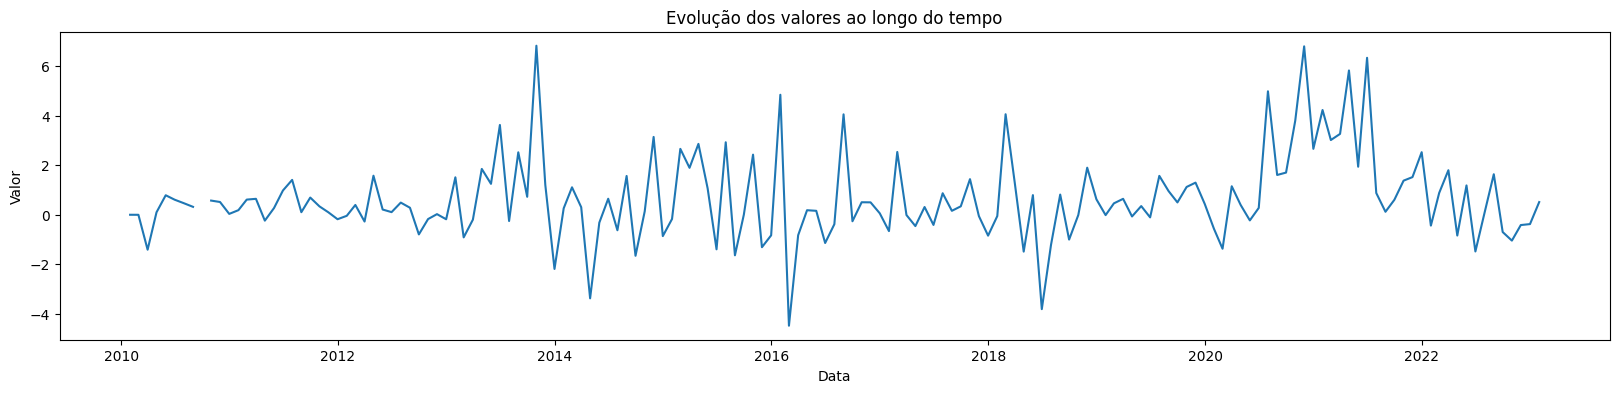

In [ ]:
# Converte a coluna 'data' para o formato de data
filtro_metal['data'] = pd.to_datetime(filtro_metal['data'])

# Agrupa os valores por mês e calcula a soma
agrupado_por_mes = filtro_metal.groupby(pd.Grouper(key='data', freq='M')).mean()

# Plota um gráfico de linha com os valores
plt.subplots(figsize=(20, 4))
plt.plot(agrupado_por_mes.index, agrupado_por_mes['variacao_mensal'])
plt.title('Evolução dos valores ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.show()

### **PLASTICO**

In [ ]:
# Filtro
filtro_plastico = agrup_classe[agrup_classe['classe'] == 'PLASTICO']

# Calcula a variação percentual mensal
filtro_plastico['variacao_mensal'] = filtro_plastico['valor'].pct_change() * 100
filtro_plastico['variacao_mensal'] = filtro_plastico['variacao_mensal'].fillna(0)

# Calcula o acumulado percentual
filtro_plastico['acumulado_percentual'] = (1 + filtro_plastico['variacao_mensal'] / 100).cumprod() * 100 - 100
filtro_plastico['acumulado_percentual'] = filtro_plastico['acumulado_percentual'].fillna(0)

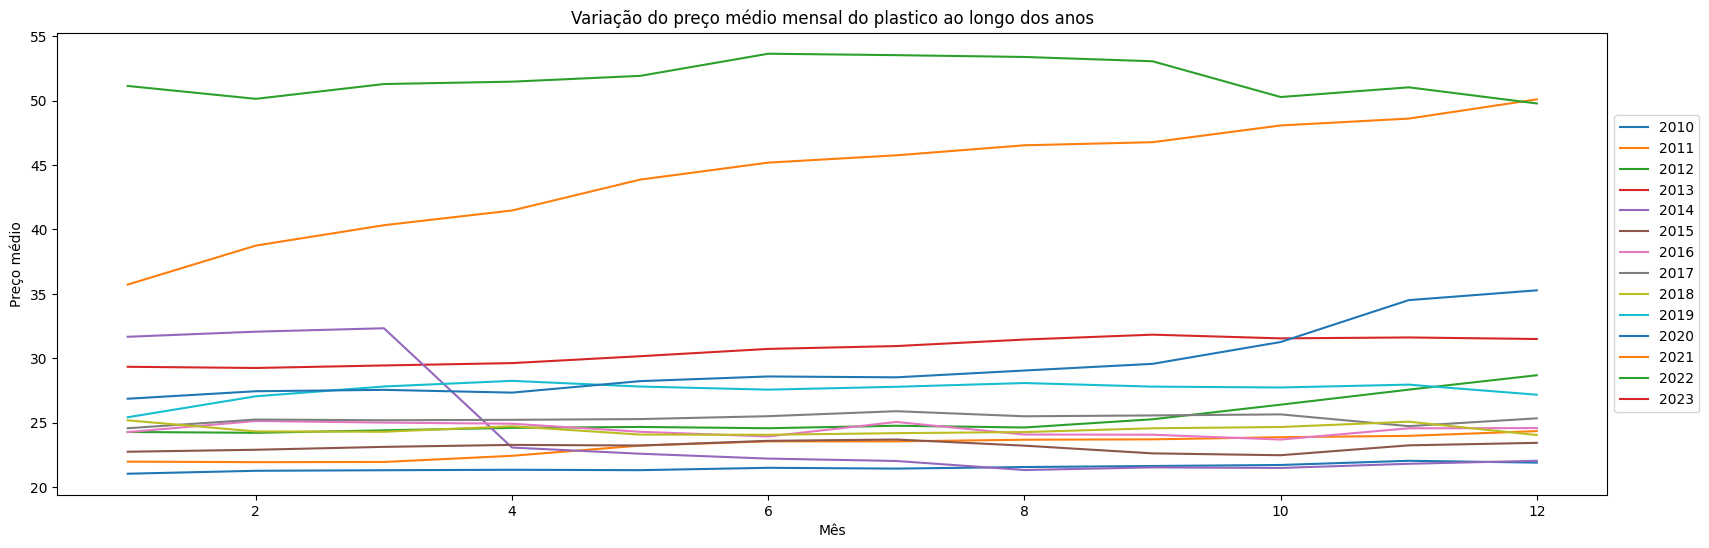

In [ ]:
# 
filtro_plastico['anos'] = filtro_plastico['ano'].astype('category')

# Agrupa os dados por ano
grupos_ano = filtro_plastico.groupby('anos')

# Cria uma figura e um conjunto de eixos
fig, ax = plt.subplots(figsize=(20, 6))

# Plota as linhas para cada ano
for ano, dados in grupos_ano:
    ax.plot(dados['mes'], dados['valor'], label=ano)

# Define o título e os rótulos dos eixos
ax.set_title("Variação do preço médio mensal do plastico ao longo dos anos")
ax.set_xlabel("Mês")
ax.set_ylabel("Preço médio")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Mostra o gráfico
plt.show()

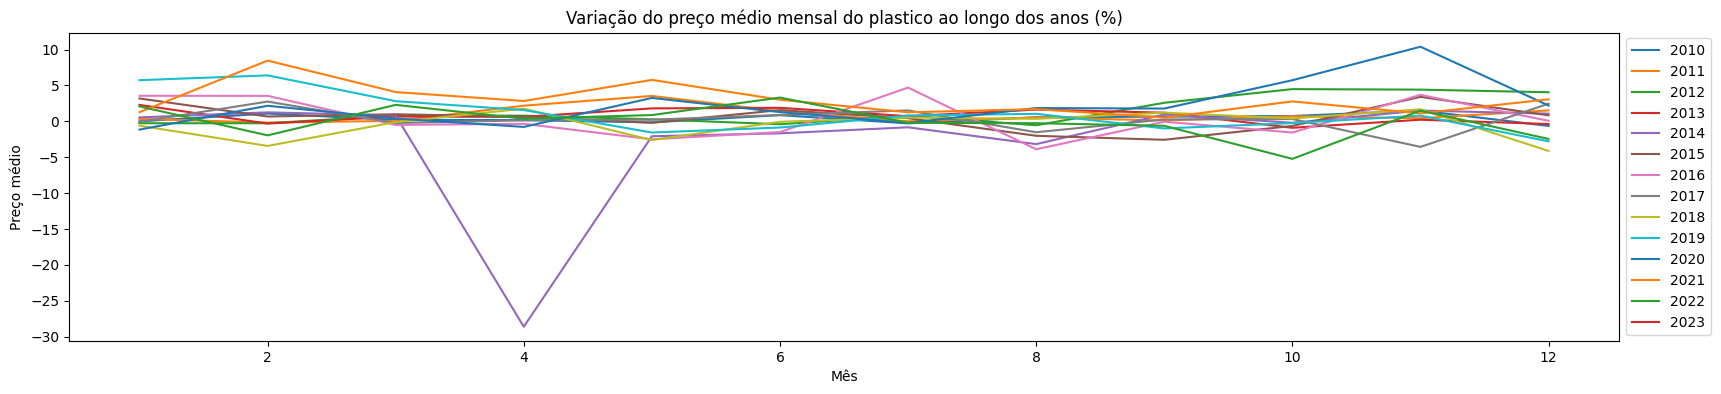

In [ ]:
# Agrupa os dados por ano
grupos_ano = filtro_plastico.groupby('anos')

# Cria uma figura e um conjunto de eixos
fig, ax = plt.subplots(figsize=(20, 4))

# Plota as linhas para cada ano
for ano, dados in grupos_ano:
    ax.plot(dados['mes'], dados['variacao_mensal'], label=ano)

# Define o título e os rótulos dos eixos
ax.set_title("Variação do preço médio mensal do plastico ao longo dos anos (%)")
ax.set_xlabel("Mês")
ax.set_ylabel("Preço médio")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Mostra o gráfico
plt.show()

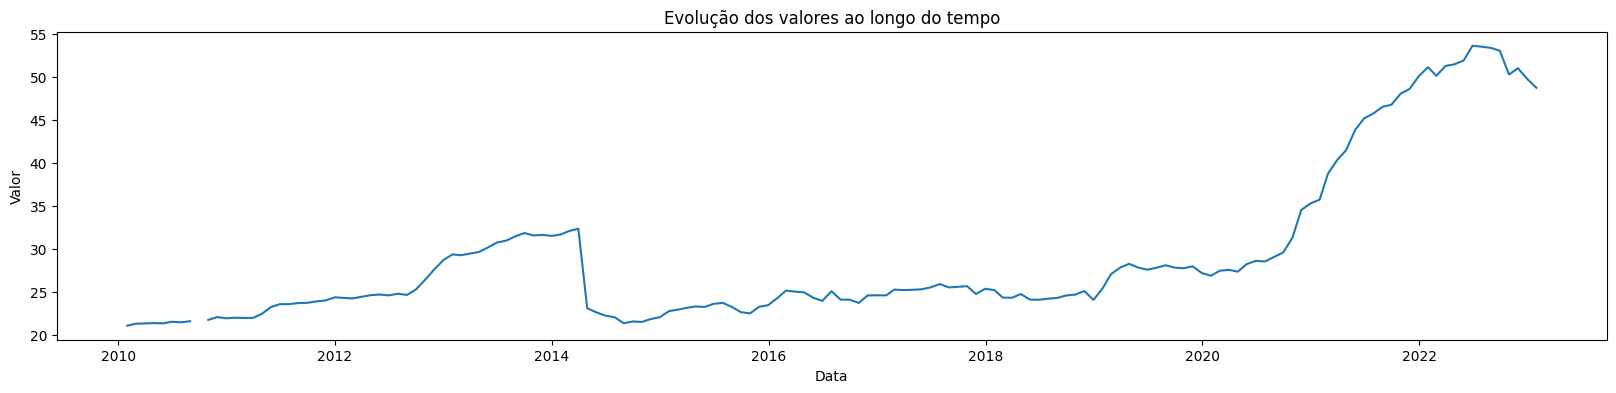

In [ ]:
# Converte a coluna 'data' para o formato de data
filtro_plastico['data'] = pd.to_datetime(filtro_plastico['data'])

# Agrupa os valores por mês e calcula a soma
agrupado_por_mes = filtro_plastico.groupby(pd.Grouper(key='data', freq='M')).mean()

# Plota um gráfico de linha com os valores
plt.subplots(figsize=(20, 4))
plt.plot(agrupado_por_mes.index, agrupado_por_mes['valor'])
plt.title('Evolução dos valores ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.show()

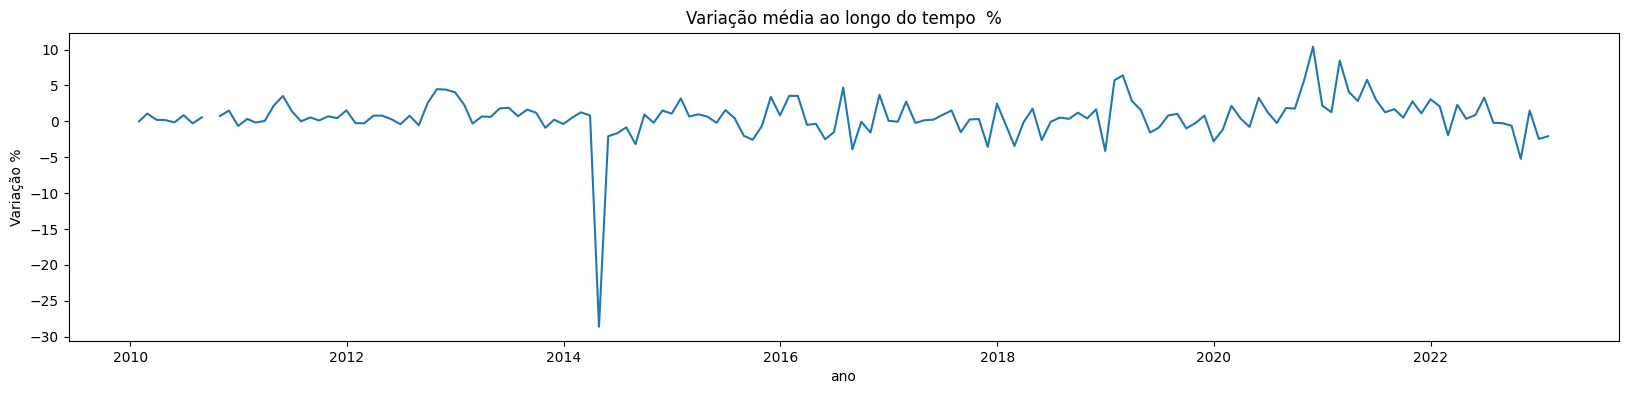

In [ ]:
# Converte a coluna 'data' para o formato de data
filtro_plastico['data'] = pd.to_datetime(filtro_plastico['data'])

# Agrupa os valores por mês e calcula a soma
agrupado_por_mes = filtro_plastico.groupby(pd.Grouper(key='data', freq='M')).mean()

# Plota um gráfico de linha com os valores
plt.subplots(figsize=(20, 4))
plt.plot(agrupado_por_mes.index, agrupado_por_mes['variacao_mensal'])
plt.title('Variação média ao longo do tempo  %')
plt.xlabel('ano')
plt.ylabel('Variação %')
plt.show()

### **CIMENTO E CONCRETO**

In [ ]:
# Filtro
filtro_cimento = agrup_classe[agrup_classe['classe'] == 'CIMENTO E CONCRETO']

# Calcula a variação percentual mensal
filtro_cimento['variacao_mensal'] = filtro_cimento['valor'].pct_change() * 100
filtro_cimento['variacao_mensal'] = filtro_cimento['variacao_mensal'].fillna(0)

# Calcula o acumulado percentual
filtro_cimento['acumulado_percentual'] = (1 + filtro_cimento['variacao_mensal'] / 100).cumprod() * 100 - 100
filtro_cimento['acumulado_percentual'] = filtro_cimento['acumulado_percentual'].fillna(0)

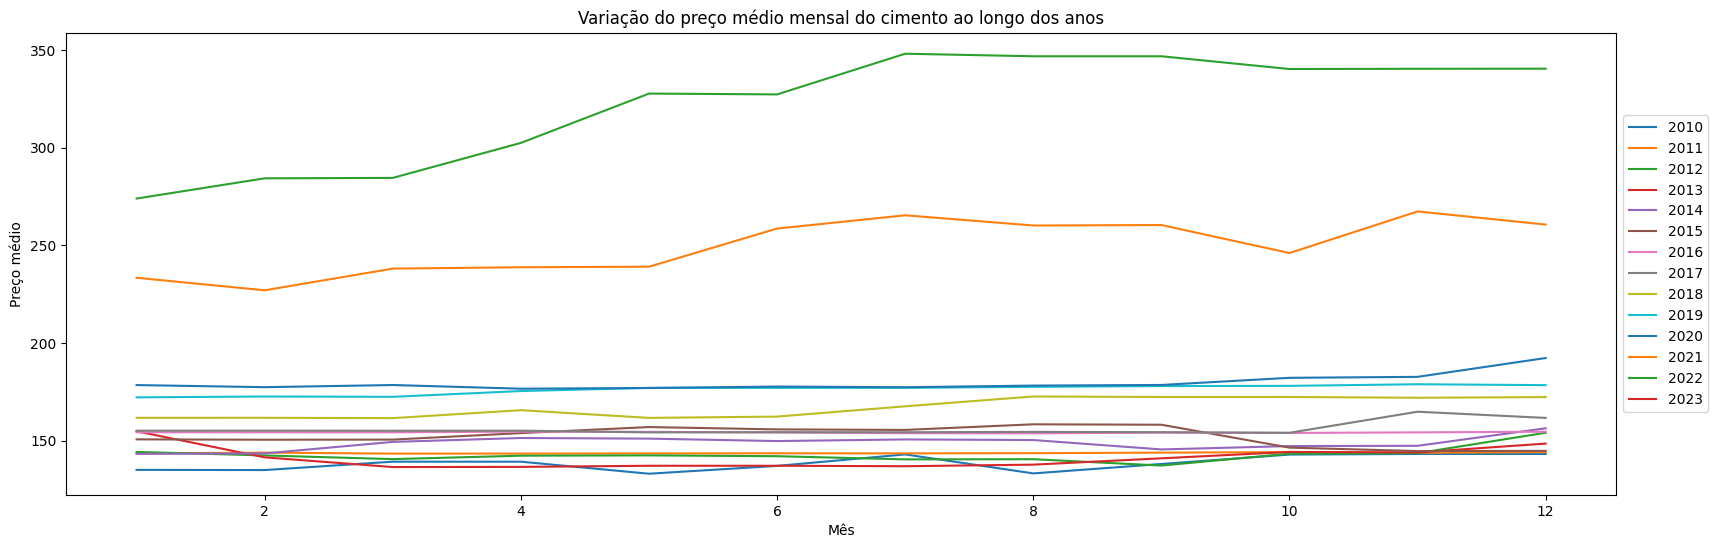

In [ ]:
# 
filtro_cimento['anos'] = filtro_cimento['ano'].astype('category')

# Agrupa os dados por ano
grupos_ano = filtro_cimento.groupby('anos')

# Cria uma figura e um conjunto de eixos
fig, ax = plt.subplots(figsize=(20, 6))

# Plota as linhas para cada ano
for ano, dados in grupos_ano:
    ax.plot(dados['mes'], dados['valor'], label=ano)

# Define o título e os rótulos dos eixos
ax.set_title("Variação do preço médio mensal do cimento ao longo dos anos")
ax.set_xlabel("Mês")
ax.set_ylabel("Preço médio")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Mostra o gráfico
plt.show()

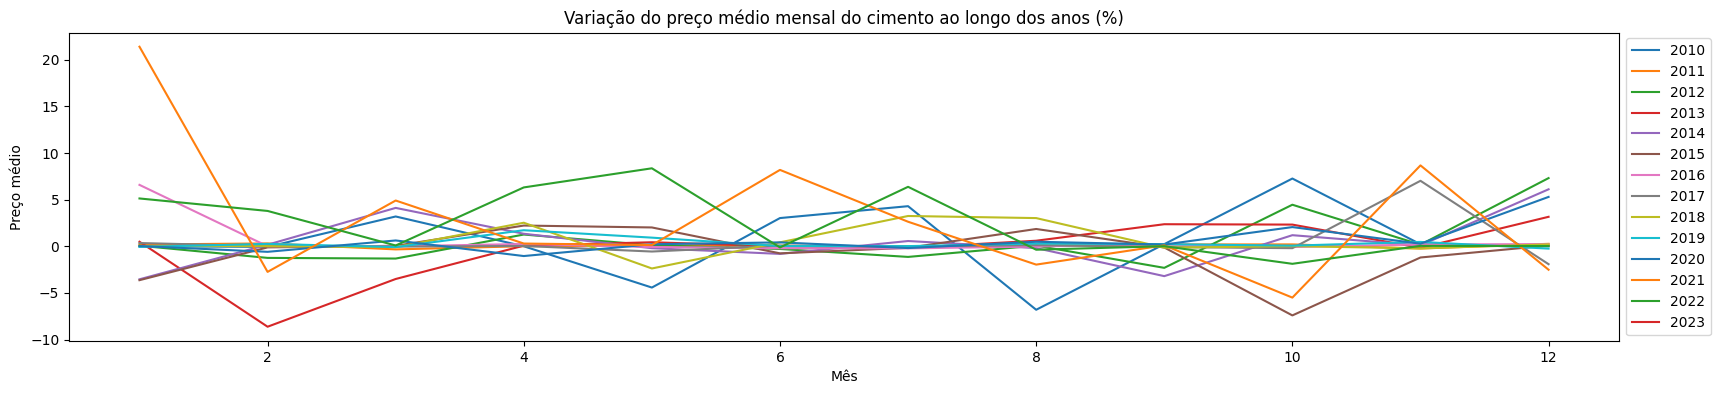

In [ ]:
# Agrupa os dados por ano
grupos_ano = filtro_cimento.groupby('anos')

# Cria uma figura e um conjunto de eixos
fig, ax = plt.subplots(figsize=(20, 4))

# Plota as linhas para cada ano
for ano, dados in grupos_ano:
    ax.plot(dados['mes'], dados['variacao_mensal'], label=ano)

# Define o título e os rótulos dos eixos
ax.set_title("Variação do preço médio mensal do cimento ao longo dos anos (%)")
ax.set_xlabel("Mês")
ax.set_ylabel("Preço médio")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Mostra o gráfico
plt.show()

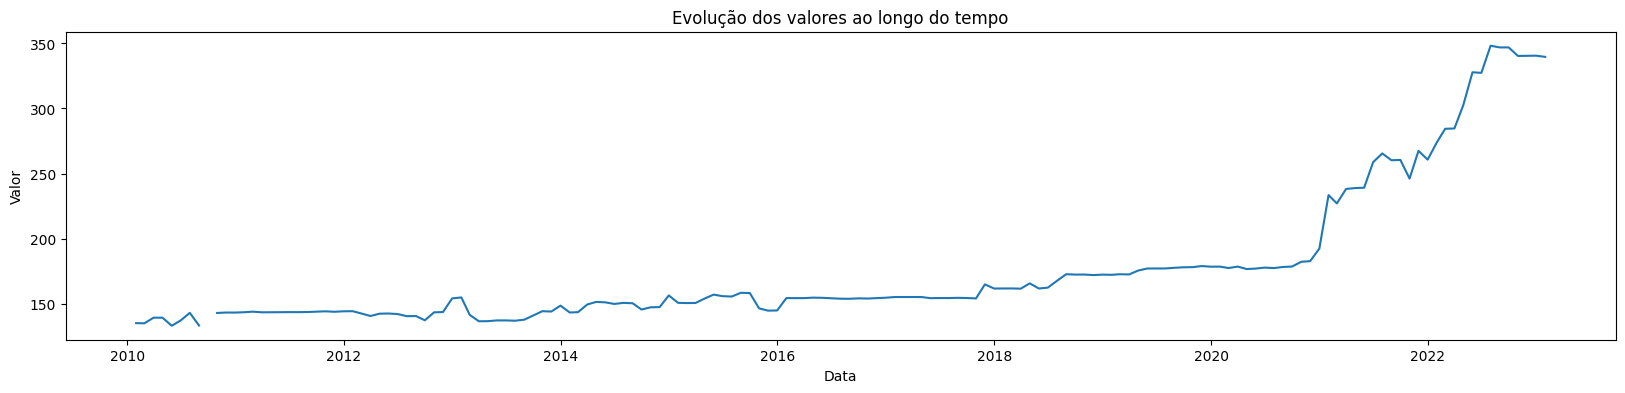

In [ ]:
# Converte a coluna 'data' para o formato de data
filtro_cimento['data'] = pd.to_datetime(filtro_cimento['data'])

# Agrupa os valores por mês e calcula a soma
agrupado_por_mes = filtro_cimento.groupby(pd.Grouper(key='data', freq='M')).mean()

# Plota um gráfico de linha com os valores
plt.subplots(figsize=(20, 4))
plt.plot(agrupado_por_mes.index, agrupado_por_mes['valor'])
plt.title('Evolução dos valores ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.show()

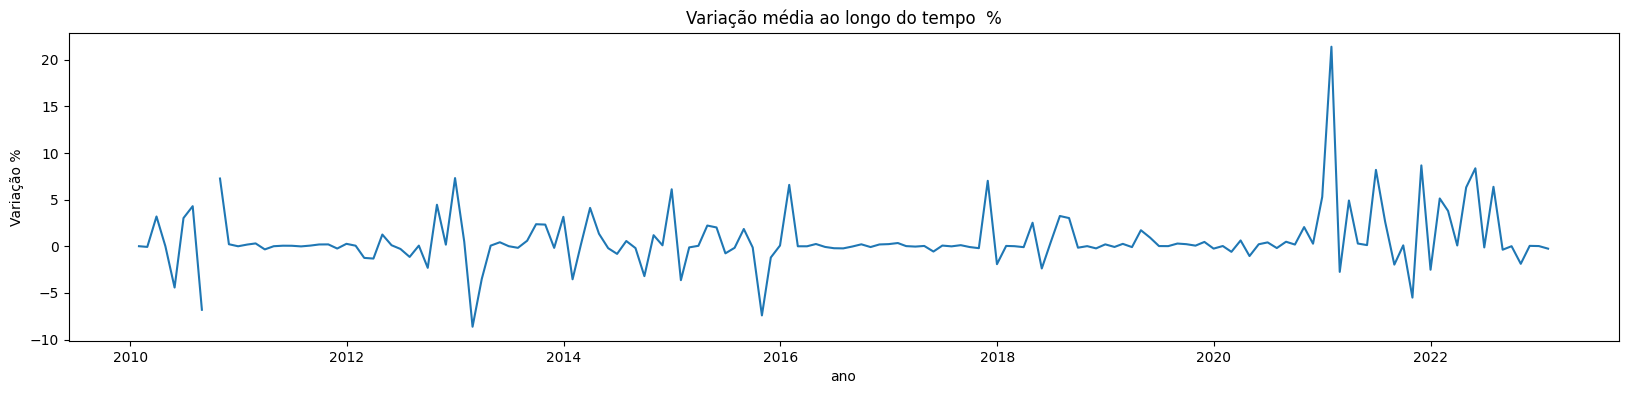

In [ ]:
# Converte a coluna 'data' para o formato de data
filtro_cimento['data'] = pd.to_datetime(filtro_cimento['data'])

# Agrupa os valores por mês e calcula a soma
agrupado_por_mes = filtro_cimento.groupby(pd.Grouper(key='data', freq='M')).mean()

# Plota um gráfico de linha com os valores
plt.subplots(figsize=(20, 4))
plt.plot(agrupado_por_mes.index, agrupado_por_mes['variacao_mensal'])
plt.title('Variação média ao longo do tempo  %')
plt.xlabel('ano')
plt.ylabel('Variação %')
plt.show()

### **MADEIRA**

In [ ]:
# Filtro
filtro_madeira = agrup_classe[agrup_classe['classe'] == 'MADEIRA']

# Calcula a variação percentual mensal
filtro_madeira['variacao_mensal'] = filtro_madeira['valor'].pct_change() * 100
filtro_madeira['variacao_mensal'] = filtro_madeira['variacao_mensal'].fillna(0)

# Calcula o acumulado percentual
filtro_madeira['acumulado_percentual'] = (1 + filtro_madeira['variacao_mensal'] / 100).cumprod() * 100 - 100
filtro_madeira['acumulado_percentual'] = filtro_madeira['acumulado_percentual'].fillna(0)

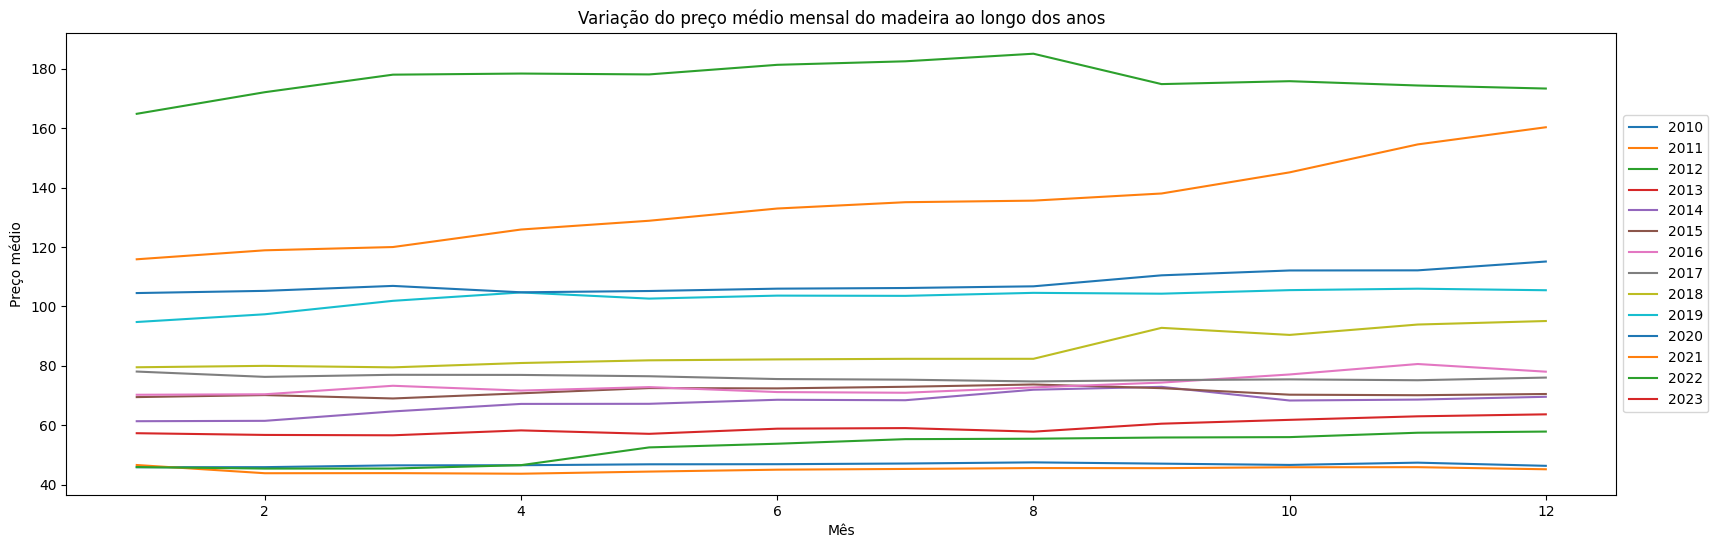

In [ ]:
# 
filtro_madeira['anos'] = filtro_madeira['ano'].astype('category')

# Agrupa os dados por ano
grupos_ano = filtro_madeira.groupby('anos')

# Cria uma figura e um conjunto de eixos
fig, ax = plt.subplots(figsize=(20, 6))

# Plota as linhas para cada ano
for ano, dados in grupos_ano:
    ax.plot(dados['mes'], dados['valor'], label=ano)

# Define o título e os rótulos dos eixos
ax.set_title("Variação do preço médio mensal do madeira ao longo dos anos")
ax.set_xlabel("Mês")
ax.set_ylabel("Preço médio")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Mostra o gráfico
plt.show()

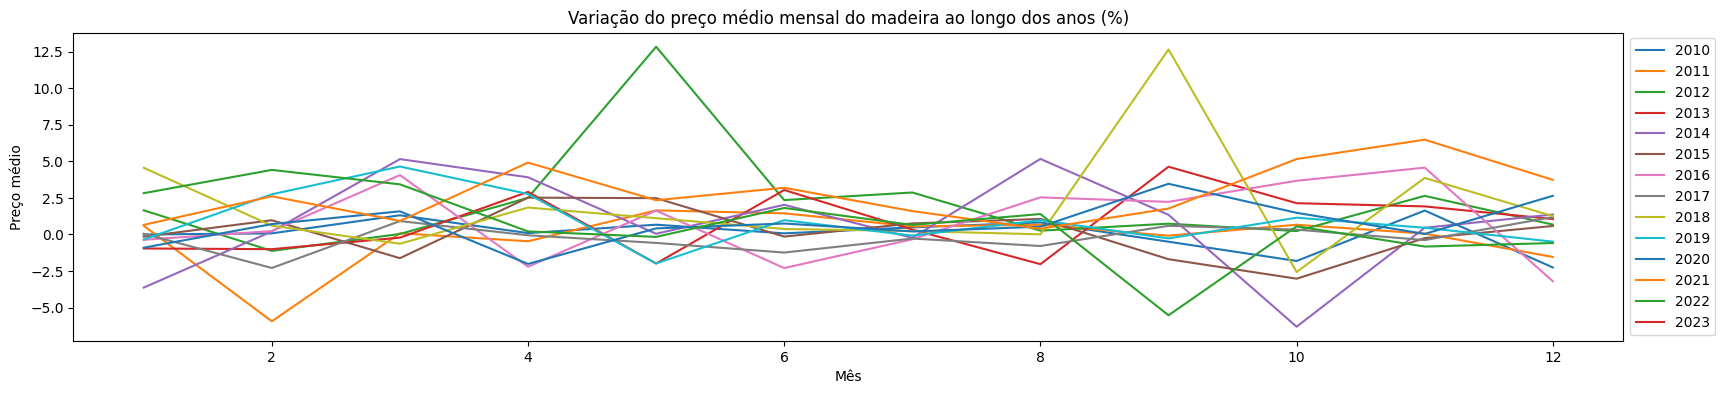

In [ ]:
# Agrupa os dados por ano
grupos_ano = filtro_madeira.groupby('anos')

# Cria uma figura e um conjunto de eixos
fig, ax = plt.subplots(figsize=(20, 4))

# Plota as linhas para cada ano
for ano, dados in grupos_ano:
    ax.plot(dados['mes'], dados['variacao_mensal'], label=ano)

# Define o título e os rótulos dos eixos
ax.set_title("Variação do preço médio mensal do madeira ao longo dos anos (%)")
ax.set_xlabel("Mês")
ax.set_ylabel("Preço médio")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Mostra o gráfico
plt.show()

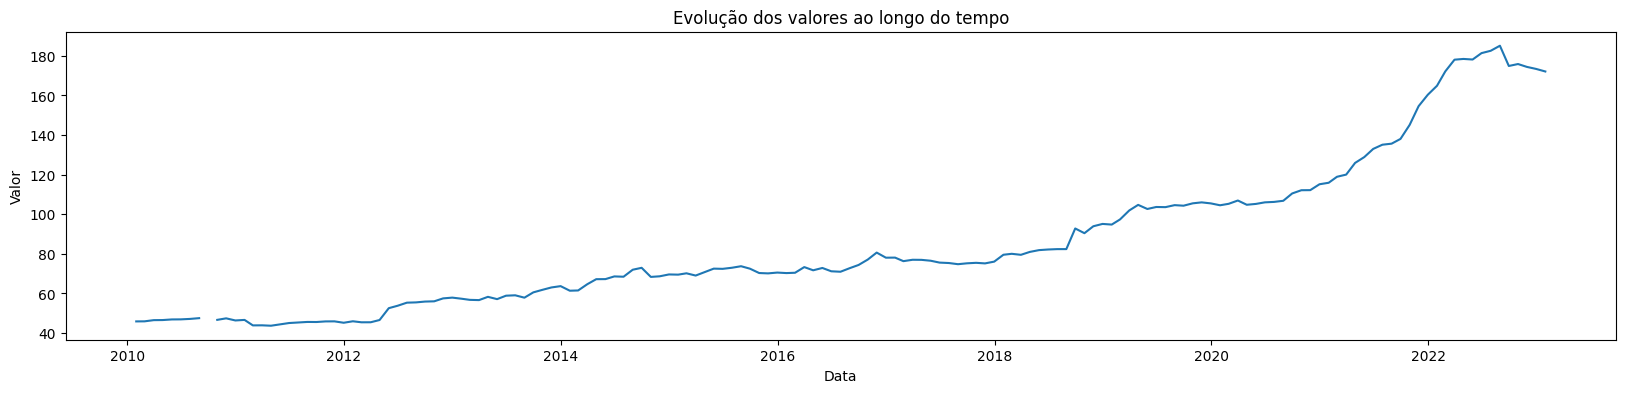

In [ ]:
# Converte a coluna 'data' para o formato de data
filtro_madeira['data'] = pd.to_datetime(filtro_madeira['data'])

# Agrupa os valores por mês e calcula a soma
agrupado_por_mes = filtro_madeira.groupby(pd.Grouper(key='data', freq='M')).mean()

# Plota um gráfico de linha com os valores
plt.subplots(figsize=(20, 4))
plt.plot(agrupado_por_mes.index, agrupado_por_mes['valor'])
plt.title('Evolução dos valores ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.show()

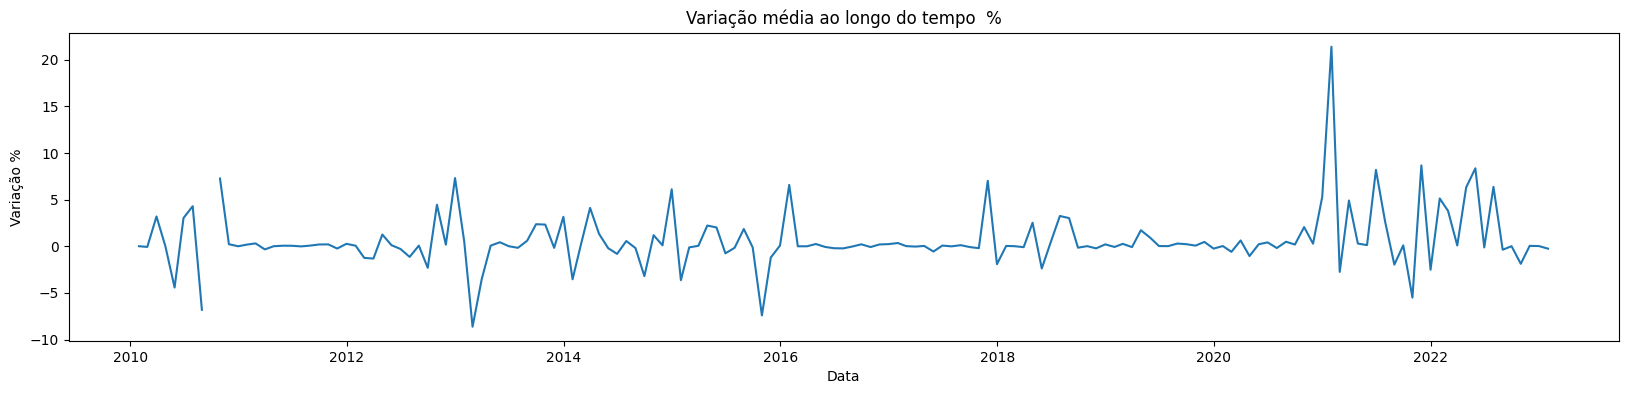

In [ ]:
# Converte a coluna 'data' para o formato de data
filtro_cimento['data'] = pd.to_datetime(filtro_cimento['data'])

# Agrupa os valores por mês e calcula a soma
agrupado_por_mes = filtro_cimento.groupby(pd.Grouper(key='data', freq='M')).mean()

# Plota um gráfico de linha com os valores
plt.subplots(figsize=(20, 4))
plt.plot(agrupado_por_mes.index, agrupado_por_mes['variacao_mensal'])
plt.title('Variação média ao longo do tempo  %')
plt.xlabel('Data')
plt.ylabel('Variação %')
plt.show()

# **INDICES ECONOMICOS**

In [ ]:
# Caminho dos dados
caminho_pasta = '/content/drive/MyDrive/PROJETO APLICADO/indices'


cub = pd.read_csv(caminho_pasta+'/cub_es.csv', sep=';')
indice = pd.read_csv(caminho_pasta+'/indice de precos.csv', sep=';')
juros = pd.read_csv(caminho_pasta+'/taxa_juros.csv', sep=';')


In [ ]:
# Juntando os dados
indices = pd.merge(indice, juros, on='data')
indices = pd.merge(indices, cub, on='data')

In [ ]:
indices['data'] = pd.to_datetime(indices['data'])
indices['ano'] = indices['data'].dt.year
indices['mes'] = indices['data'].dt.month

In [ ]:
indices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 190
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   data            191 non-null    datetime64[ns]
 1   ipca_indice     191 non-null    object        
 2   ipca_mes        191 non-null    object        
 3   ipca_ano        191 non-null    object        
 4   ipca_cum_ano    191 non-null    object        
 5   inpc_indice     191 non-null    object        
 6   inpc_mes        191 non-null    object        
 7   inpc_ano        191 non-null    object        
 8   inpc_cum_ano    191 non-null    object        
 9   ipca-e_indice   191 non-null    object        
 10  ipca-e_mes      191 non-null    object        
 11  ipca-e_ano      191 non-null    object        
 12  ipca-e_cum_ano  191 non-null    object        
 13  selic_mes       191 non-null    object        
 14  selic_ano       191 non-null    object        
 15  selic_

In [ ]:
valor = indices.select_dtypes(include=['object']).columns

In [ ]:
for coluna in valor:
  indices[coluna] = pd.to_numeric(indices[coluna].str.replace('.', '').str.replace(',', '.'))

In [ ]:
indices.head()

,data,ipca_indice,ipca_mes,ipca_ano,ipca_cum_ano,inpc_indice,inpc_mes,inpc_ano,inpc_cum_ano,ipca-e_indice,...,tbf_acum_ano,tjlp_mes,tjlp_ano,tjlp_acum_ano,cub/m2,cub_mes,cub_ano,cub_acum_ano,ano,mes
0,2007-01-02,2638.12,0.44,0.88,3.02,2681.28,0.42,0.91,3.12,2587.78,...,1.91,0.53,6.5,1.06,376.91,NaN,NaN,NaN,2007,1
1,2007-01-03,2647.88,0.37,1.26,2.96,2693.08,0.44,1.36,3.30,2598.39,...,2.94,0.53,6.5,1.59,381.20,1.14,NaN,NaN,2007,1
2,2007-01-04,2654.50,0.25,1.51,3.00,2700.08,0.26,1.62,3.44,2604.11,...,3.89,0.53,6.5,2.13,381.52,0.08,NaN,NaN,2007,1
3,2007-01-05,2661.93,0.28,1.79,3.18,2707.10,0.26,1.88,3.57,2610.88,...,4.91,0.53,6.5,2.66,377.38,-1.09,NaN,NaN,2007,1
4,2007-01-06,2669.38,0.28,2.08,3.69,2715.49,0.31,2.20,3.97,2618.45,...,5.83,0.53,6.5,3.20,379.34,0.52,NaN,NaN,2007,1


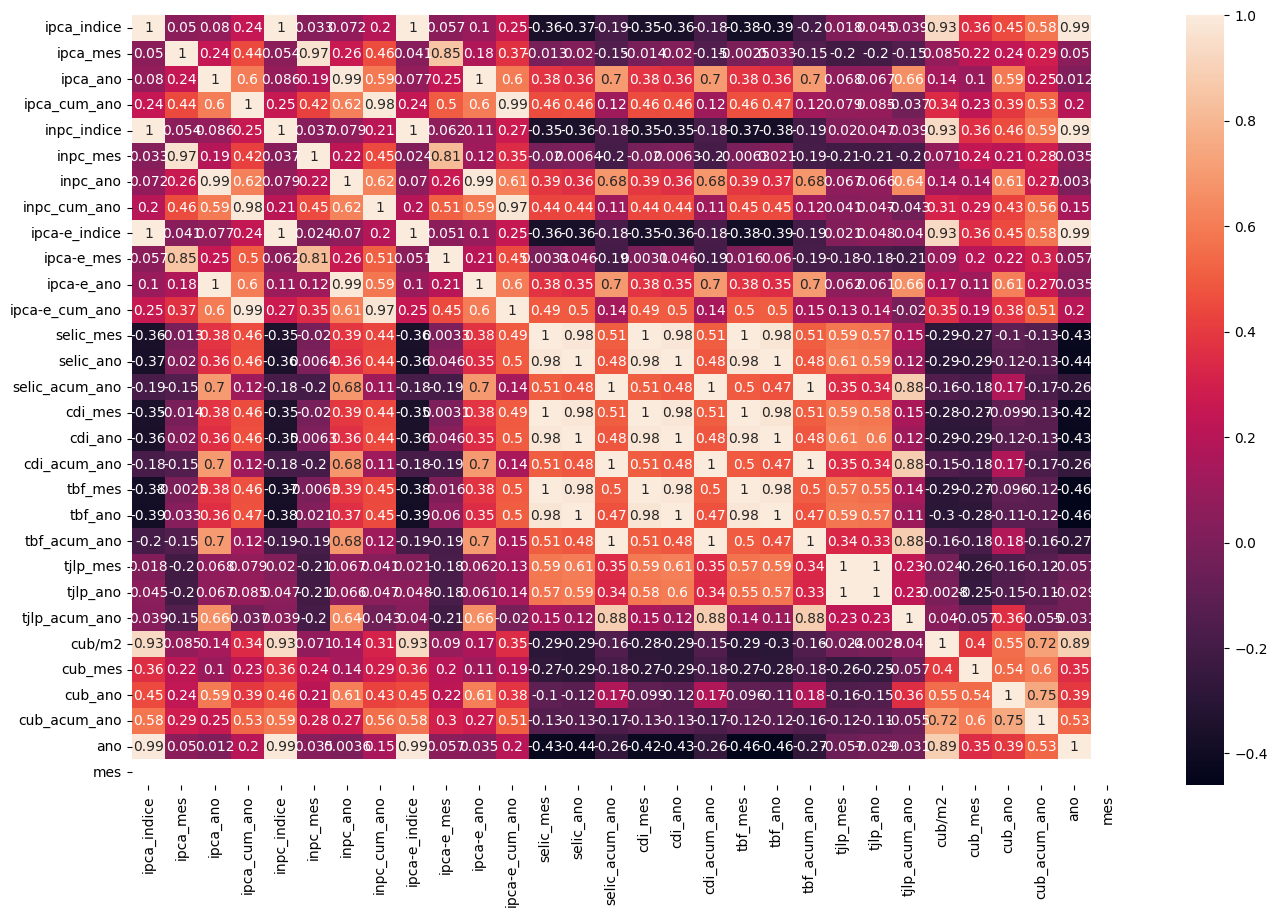

In [ ]:
plt.figure(figsize=(16, 10))
sns.heatmap(var_global.corr(method='pearson'), annot=True);

In [ ]:
indices.columns

Index(['data', 'ipca_indice', 'ipca_mes', 'ipca_ano', 'ipca_cum_ano',
       'inpc_indice', 'inpc_mes', 'inpc_ano', 'inpc_cum_ano', 'ipca-e_indice',
       'ipca-e_mes', 'ipca-e_ano', 'ipca-e_cum_ano', 'selic_mes', 'selic_ano',
       'selic_acum_ano', 'cdi_mes', 'cdi_ano', 'cdi_acum_ano', 'tbf_mes',
       'tbf_ano', 'tbf_acum_ano', 'tjlp_mes', 'tjlp_ano', 'tjlp_acum_ano',
       'cub/m2', 'cub_mes', 'cub_ano', 'cub_acum_ano', 'ano', 'mes'],
      dtype='object')

In [ ]:
indices_mes = indices[['data', 'ipca_mes', 'inpc_mes', 'ipca-e_mes', 'selic_mes','cdi_mes', 'tbf_mes',
       'tjlp_mes','cub_mes']]

## MERGE COM A PLANINHA COM OS INSUMOS

In [ ]:
dados_ii = pd.merge(dados_filtrado, indices_mes, on='data')

In [ ]:
dados_ii.head()

,valor,data,ipca_mes,inpc_mes,ipca-e_mes,selic_mes,cdi_mes,tbf_mes,tjlp_mes,cub_mes
0,0.07,2010-01-01,0.75,0.88,0.52,0.66,0.66,0.65,0.49,0.01
1,3.67,2010-01-01,0.75,0.88,0.52,0.66,0.66,0.65,0.49,0.01
2,5.68,2010-01-01,0.75,0.88,0.52,0.66,0.66,0.65,0.49,0.01
3,1.16,2010-01-01,0.75,0.88,0.52,0.66,0.66,0.65,0.49,0.01
4,1.88,2010-01-01,0.75,0.88,0.52,0.66,0.66,0.65,0.49,0.01


In [ ]:
dados_ii.columns

Index(['valor', 'data', 'ipca_mes', 'inpc_mes', 'ipca-e_mes', 'selic_mes',
       'cdi_mes', 'tbf_mes', 'tjlp_mes', 'cub_mes'],
      dtype='object')

In [ ]:
colunas = dados_ii.select_dtypes(include=['datetime64[ns]','float64']).columns


In [ ]:
dados_ii = dados_ii[colunas]

In [ ]:
global_ii = dados_ii.groupby(['data'], as_index=False).mean()

In [ ]:
global_ii.head()

,data,valor,ipca_mes,inpc_mes,ipca-e_mes,selic_mes,cdi_mes,tbf_mes,tjlp_mes,cub_mes
0,2010-01-01,63.130685,0.75,0.88,0.52,0.66,0.66,0.65,0.49,0.01
1,2011-01-01,65.013834,0.83,0.94,0.76,0.86,0.86,0.83,0.49,0.53
2,2012-01-01,67.760033,0.56,0.51,0.65,0.89,0.89,0.86,0.49,0.10
3,2013-01-01,71.923927,0.86,0.92,0.88,0.60,0.59,0.57,0.41,0.11
4,2014-01-01,79.130564,0.55,0.63,0.67,0.85,0.84,0.79,0.41,0.74


In [ ]:
colunas = global_ii.select_dtypes(include=['float64']).columns


# Calcula a variação percentual mensal
for coluna in colunas:
  global_ii[coluna+'_var'] = global_ii[coluna].pct_change() * 100
  global_ii[coluna+'_var'] = global_ii[coluna+'_var'].fillna(0)



In [ ]:
global_ii.head()

,data,valor,ipca_mes,inpc_mes,ipca-e_mes,selic_mes,cdi_mes,tbf_mes,tjlp_mes,cub_mes,valor_var,ipca_mes_var,inpc_mes_var,ipca-e_mes_var,selic_mes_var,cdi_mes_var,tbf_mes_var,tjlp_mes_var,cub_mes_var
0,2010-01-01,63.130685,0.75,0.88,0.52,0.66,0.66,0.65,0.49,0.01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2011-01-01,65.013834,0.83,0.94,0.76,0.86,0.86,0.83,0.49,0.53,2.982938,10.666667,6.818182,46.153846,30.303030,30.303030,27.692308,0.000000,5200.000000
2,2012-01-01,67.760033,0.56,0.51,0.65,0.89,0.89,0.86,0.49,0.10,4.224023,-32.530120,-45.744681,-14.473684,3.488372,3.488372,3.614458,0.000000,-81.132075
3,2013-01-01,71.923927,0.86,0.92,0.88,0.60,0.59,0.57,0.41,0.11,6.145059,53.571429,80.392157,35.384615,-32.584270,-33.707865,-33.720930,-16.326531,10.000000
4,2014-01-01,79.130564,0.55,0.63,0.67,0.85,0.84,0.79,0.41,0.74,10.019805,-36.046512,-31.521739,-23.863636,41.666667,42.372881,38.596491,0.000000,572.727273


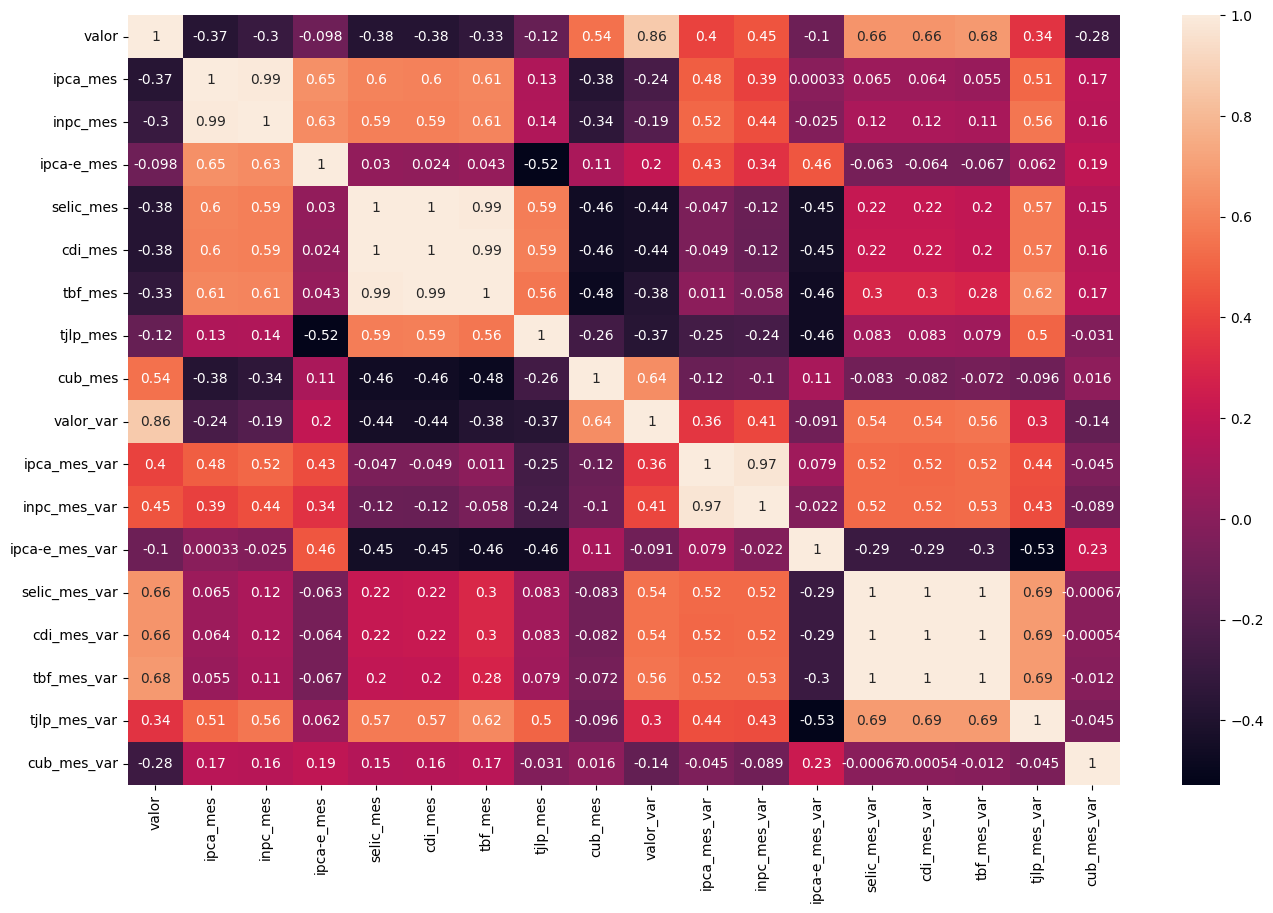

In [ ]:
plt.figure(figsize=(16, 10))
sns.heatmap(global_ii.corr(method='pearson'), annot=True);





*   **A variação mensal do preço médio dos insumos em termos gerais tem uma boa correlação com a com o cub mensal.**
*   **Existem correlações boas entre valor(preços médio) as variações mensais da selic, cdi e tbf, mas esses indices são altamente correlacionados e por isso só ficará um.**
*   **Assim como o IPCA e o INPC. Só ficará um indice de cada. Um da taxa de juros, um de indices de preço.**
*   **O indice cub também se manterá**






In [ ]:
global_ii = global_ii[['data', 'valor', 'inpc_mes', 'selic_mes',
                      'tjlp_mes', 'cub_mes', 'valor_var',
                      'inpc_mes_var','selic_mes_var',
                      'cdi_mes_var','cub_mes_var']]